In [1]:
%matplotlib inline
import sys
sys.path.insert(0, "../..")

<!--<badge>--><a href="https://colab.research.google.com/github/softmatterlab/DeepTrack-2.0/blob/jp/vit/examples/LodeSTAR/04.track_Fluo-C2DL-Huh7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

In [2]:

import deeptrack as dt
import numpy as np
import skimage.color
import matplotlib.pyplot as plt

(-0.5, 75.5, 75.5, -0.5)

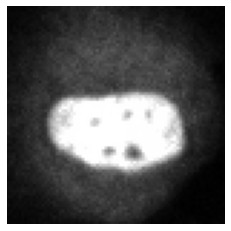

In [3]:
downsample = 2
t, x, y, w = (0, 482, 228, 76)
training_image = dt.LoadImage(f"data/Fluo-C2DL-Huh7/t{t:03d}.tif")()._value / 256
crop = training_image[y:y+w, x:x+w]
plt.imshow(crop, cmap="gray")
plt.axis("off")


In [4]:

model = dt.models.LodeSTAR(input_shape=(None, None, 1))

train_set =   (
    dt.Value(crop)
    >> dt.Affine(scale=lambda:np.random.uniform(0.7, 1.4, 2), translate=lambda:np.random.uniform(-2, 2, 2))
    >> dt.AveragePooling((downsample, downsample, 1))
    >> dt.Add(lambda: np.random.randn() * 0.2)
    >> dt.Multiply(lambda: np.random.uniform(0.25, 1.1))
    >> dt.Gaussian(sigma=lambda:np.random.uniform(0, 0.04))  
    
)

model.fit(
    train_set,
    epochs=30,
    batch_size=8,
)



Generating 161 / 160 samples before starting training
Epoch 1/30
161/161 [==============================] - 7s 12ms/step - total_loss: 1.7984 - consistency_loss: 0.9148
Epoch 2/30
161/161 [==============================] - 1s 9ms/step - total_loss: 1.3477 - consistency_loss: 0.7474
Epoch 3/30
161/161 [==============================] - 2s 12ms/step - total_loss: 0.8224 - consistency_loss: 0.5769
Epoch 4/30
161/161 [==============================] - 2s 12ms/step - total_loss: 0.7399 - consistency_loss: 0.5224
Epoch 5/30
161/161 [==============================] - 2s 12ms/step - total_loss: 0.6601 - consistency_loss: 0.4780
Epoch 6/30
161/161 [==============================] - 2s 12ms/step - total_loss: 0.7261 - consistency_loss: 0.4759
Epoch 7/30
161/161 [==============================] - 2s 12ms/step - total_loss: 0.7336 - consistency_loss: 0.4240
Epoch 8/30
161/161 [==============================] - 2s 12ms/step - total_loss: 0.6686 - consistency_loss: 0.4039
Epoch 9/30
161/161 [=======

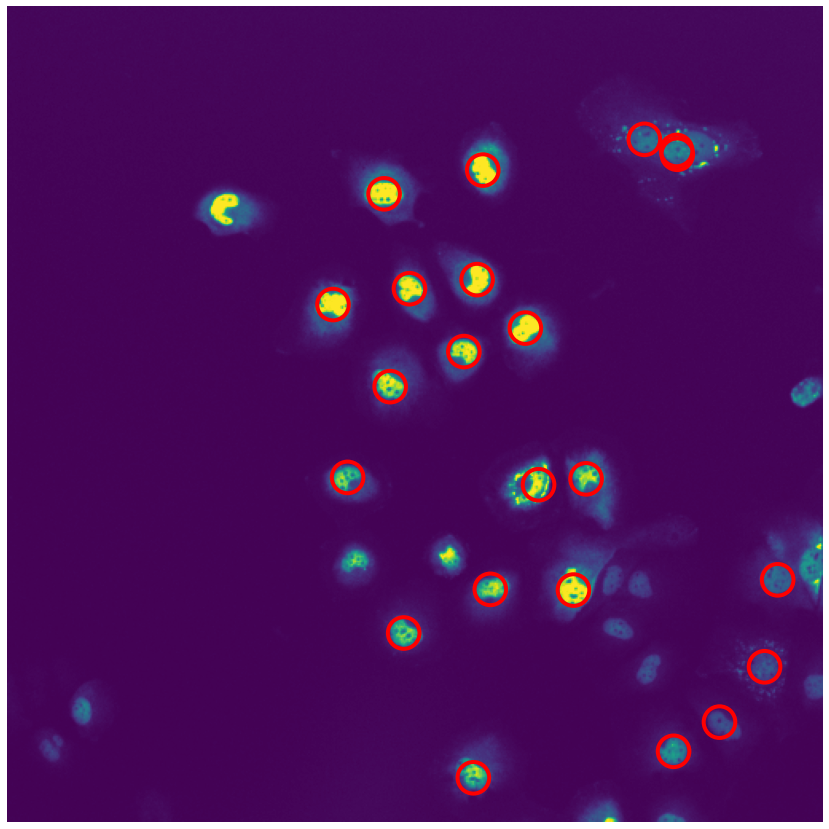

In [5]:
#May need to tune these to get optimal performance!
alpha = 0.9
cutoff = 0.998

frame_index = 10

image = (
    dt.LoadImage(f"data/Fluo-C2DL-Huh7/t{frame_index:03d}.tif")
    >> dt.AveragePooling((downsample, downsample, 1))
)()._value / 256


detections = model.predict_and_detect(image[np.newaxis], alpha=alpha, beta=1-alpha, cutoff=cutoff, mode="quantile")[0]
# detections = autotracker.detect(pred[0], weights[0], beta=1-alpha, alpha=alpha, cutoff=cutoff, mode="constant")

plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.axis("off")
plt.scatter(detections[:, 1], detections[:, 0], s=1000, linewidths=4, facecolors="none", edgecolors="r")